In [460]:
import yfinance as yfi                 #allow us to import data from Yahoo Finance directly to Python
import numpy as npy                    #Used for scientific computing and working with arrays 
import pandas as pds                   #used for data wrangling and analysis
import matplotlib as maplot            #cross-platform, data visualization and graphical plotting
import matplotlib.pyplot as maplotpy   #necessary to make some change to a figure
import seaborn as sborn
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as spystat          #contains a large number of probability distributions, summary and frequency statistics and more

# DATA

In [461]:
available_data = yfi.download("LTC-USD", start="2021-03-31", end="2022-04-01")

[*********************100%***********************]  1 of 1 completed


In [462]:
available_data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-30,194.470825,200.121155,191.152344,196.682098,196.682098,3604665752
2021-03-31,196.688950,199.282684,189.491013,197.499100,197.499100,3416343750
2021-04-01,197.524368,205.466995,195.942993,204.112518,204.112518,3871809467
2021-04-02,204.053619,214.403564,202.508560,213.228394,213.228394,4095228243
2021-04-03,213.159744,218.240234,197.146210,197.148209,197.148209,4020429578


In [463]:
available_data.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-27,124.889275,129.397476,123.675545,129.397476,129.397476,740569100
2022-03-28,129.400635,132.412476,127.852745,127.938614,127.938614,943699101
2022-03-29,127.911484,131.786041,127.729424,130.061234,130.061234,837905297
2022-03-30,130.054733,133.906784,127.102615,131.169342,131.169342,928949835
2022-03-31,131.166367,132.776428,122.522713,123.716011,123.716011,1352615724


In [438]:
available_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,367.000000,367.000000,367.000000,367.000000,367.000000,3.670000e+02
mean,172.844068,180.011018,164.835386,172.579606,172.579606,2.729510e+09
std,54.695650,59.071395,50.174792,54.668444,54.668444,2.433666e+09
min,98.861572,102.160332,92.612610,98.869263,98.869263,5.350115e+08
25%,133.038216,136.950172,127.791084,132.328194,132.328194,1.150382e+09
50%,163.801666,170.386002,154.733643,163.449493,163.449493,2.010202e+09
75%,195.486229,201.211494,186.656746,195.236992,195.236992,3.083993e+09
max,387.869171,412.960144,345.298828,386.450775,386.450775,1.325412e+10


In [439]:
available_data[available_data["Adj Close"] == available_data["Adj Close"].max()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-09,347.090027,388.232788,335.173462,386.450775,386.450775,9835832552


In [440]:
available_data[available_data["Adj Close"] == available_data["Adj Close"].min()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-07,101.595879,103.662041,97.236954,98.869263,98.869263,756482342


In [441]:
data = available_data['Adj Close'].round(2)       #Adjusted Close is the final price of the stock in the day, and the one we going to analyse

array([<AxesSubplot:xlabel='Date'>], dtype=object)

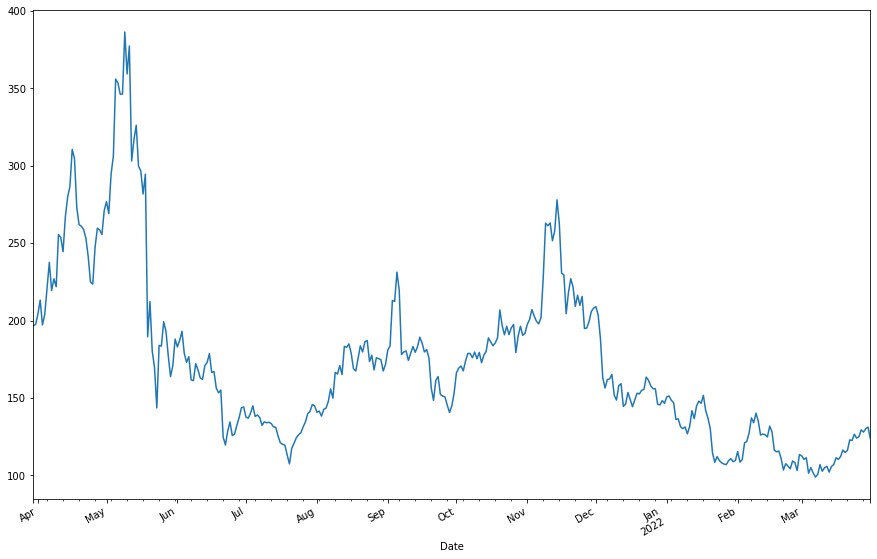

In [442]:
data.plot(figsize=(15, 10), subplots=True)

array([<AxesSubplot:title={'center':'Litecoin Price Trend'}, xlabel='Date'>],
      dtype=object)

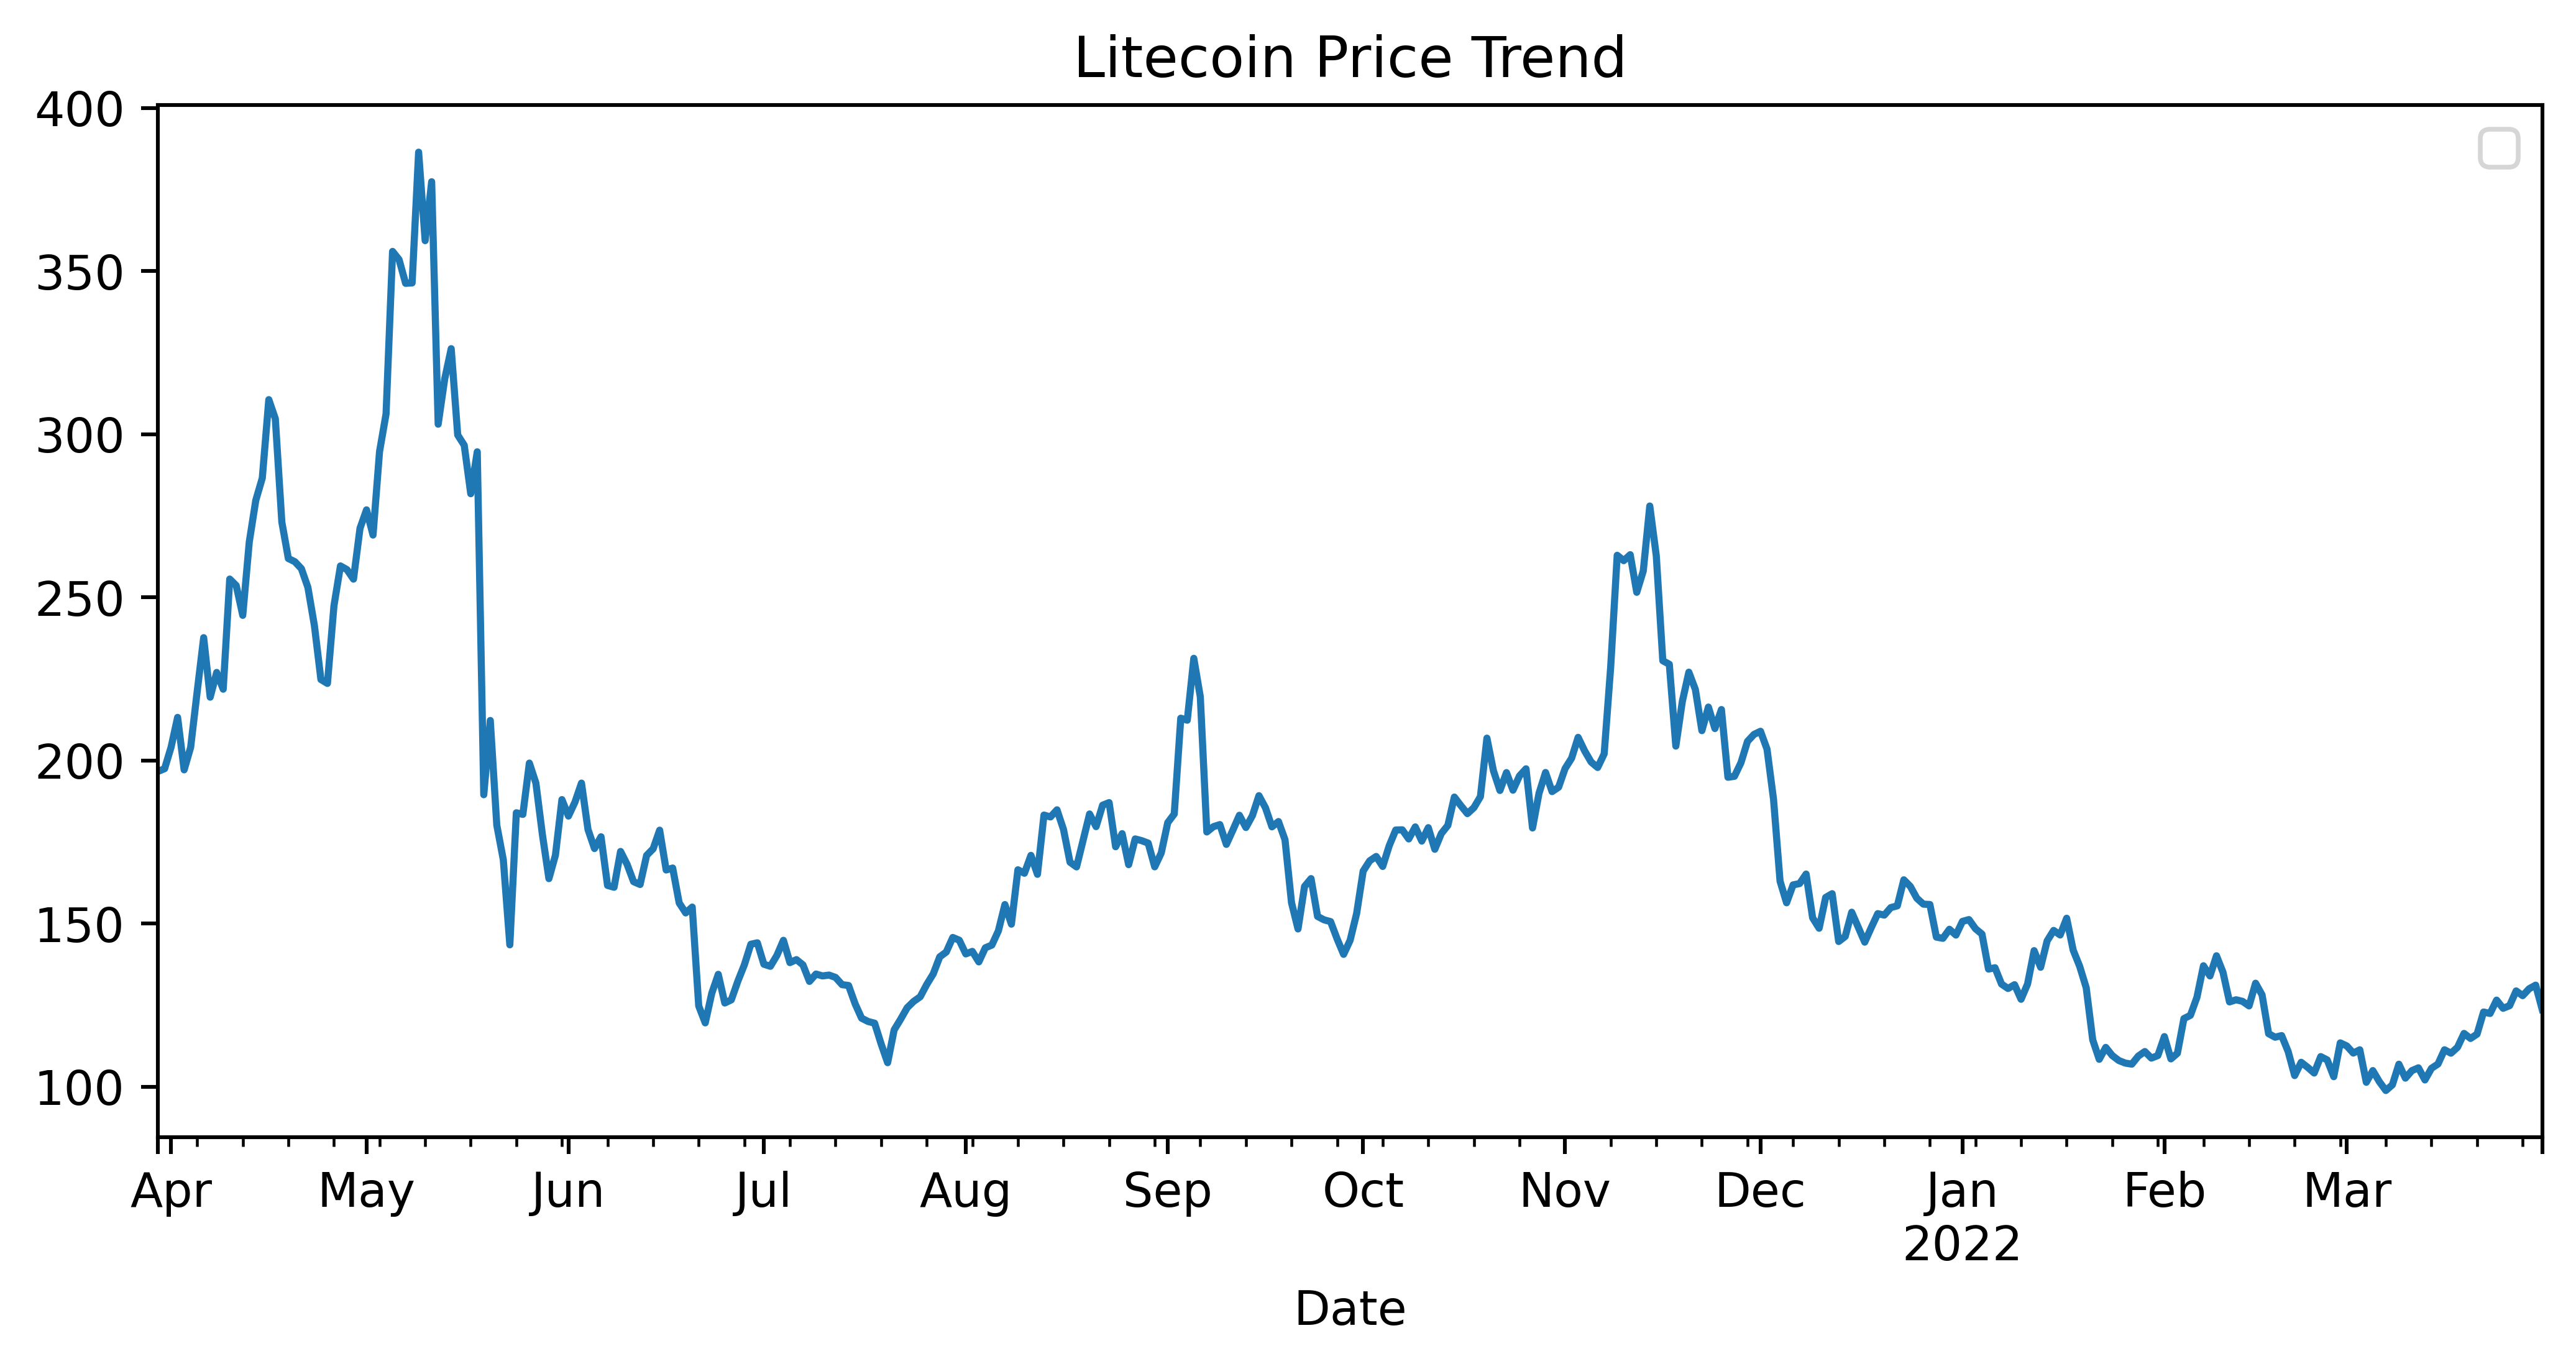

In [443]:
maplotpy.figure(figsize=[9, 4], facecolor="w", dpi=550)
maplotpy.legend(["Cryptocurrency Price","Moving Average"])
maplotpy.title("Litecoin Price Trend")
data.plot(figsize=(9, 5), subplots=True)
#sns.lineplot(data.index, data["Adj Close"].rolling(window=20).mean())

# Log Return

Log returns is denoted by log_return. Data saved in the log_return variable is checked with the help of .head() method and rounded up to 2 decimal places with the help of .round(2) method.

In [464]:
log_return = npy.log(data / data.shift(1))
log_return.head().round(2)

Date
2021-03-30     NaN
2021-03-31    0.00
2021-04-01    0.03
2021-04-02    0.04
2021-04-03   -0.08
Name: Adj Close, dtype: float64

Graph of cumulative sum for log return using comtinuous compounding is plotted.

<AxesSubplot:xlabel='Date'>

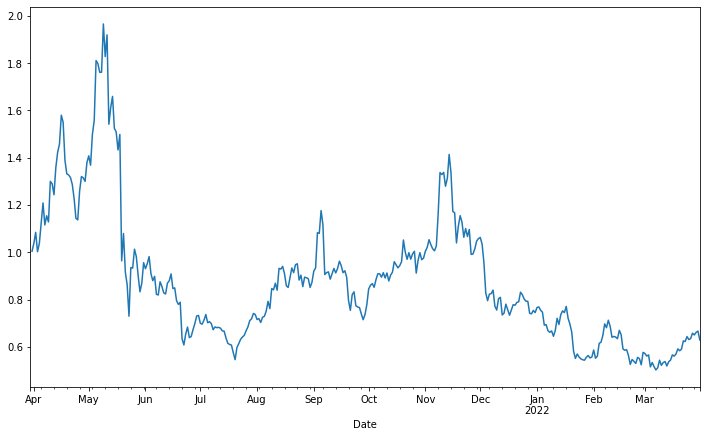

In [465]:
change.cumsum().apply(npy.exp).plot(figsize=(12, 7)) 

In [466]:
TRADING_DAYS = 365
returns = (data - data.shift(1))/data.shift(1)
returns

Date
2021-03-30         NaN
2021-03-31    0.004169
2021-04-01    0.033468
2021-04-02    0.044682
2021-04-03   -0.075412
                ...   
2022-03-27    0.036195
2022-03-28   -0.011283
2022-03-29    0.016570
2022-03-30    0.008535
2022-03-31   -0.056797
Name: Adj Close, Length: 367, dtype: float64

Cryptocurrency returns for the period

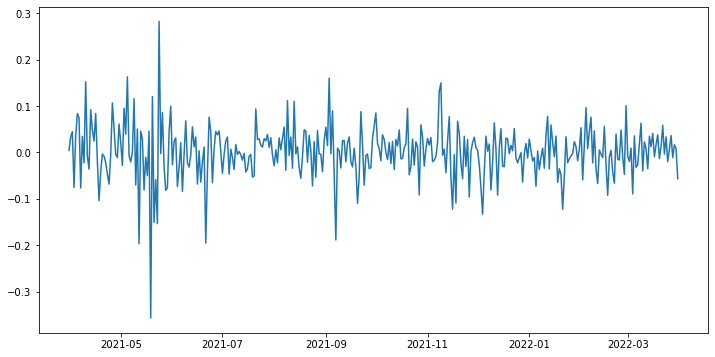

In [467]:
maplotpy.figure(figsize=(12,6))
maplotpy.plot(returns)

<AxesSubplot:title={'center':'Distribution of Return of Litecoin Price'}, xlabel='Adj Close', ylabel='Density'>

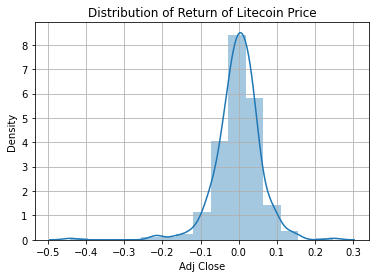

In [468]:
maplotpy.title("Distribution of Return of Litecoin Price")
maplotpy.grid()
sborn.distplot(data.pct_change().apply(lambda x: npy.log(x+1)), bins=15,)

# Historical Volatility

Annualized Historical Volatility of Litecoin

Annualized volatility is calculated by taking standard deviation of daily log returns multiplied by square root of 366. Change denotes logarithmic returns of the stock whereas vol represents the volatility of the stock for the whole year.

In [449]:
S = available_data['Adj Close'][-1]
print('The spot price is $', round(S,2),'.')

The spot price is $ 123.72 .


In [455]:
vol = npy.sqrt(365)*log_return.std()
print("The annualized volatility is",round(vol*100,2),"%.") 

The annualized volatility is 112.56 %.


Text(0, 0.5, 'Frequency of log return')

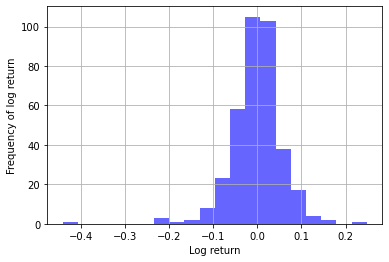

In [456]:
fig, ax = maplotpy.subplots()
change.hist(ax=ax, bins=20, alpha=0.6, color='b')
ax.set_xlabel('Log return')
ax.set_ylabel('Frequency of log return')

Annualized volatility for the first six months

# Pricing Model

# Monte - Carlo Simulation

In [469]:
def mcs_simulation_npy(p):
    M = p
    I = p
    dt = T / M 
    S = npy.zeros((M + 1, I))
    S[0] = S0 
    rn = npy.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * npy.exp((r - sigma ** 2 / 2) * dt + sigma * npy.sqrt(dt) * rn[t]) 
    return S

In [470]:
S0 = data[-1]            # spot stock price
K =  110.00             # strike price
T = 1.0                 # time to maturity
r = 0.0163              # risk free rate
sigma = 1.1256          # diffusion coefficient or volatility annualised

In [471]:
S = mcs_simulation_npy(10000)

In [472]:
S = npy.transpose(S)
S

array([[123.72      , 121.74534263, 121.85942449, ..., 133.00108382,
        134.2481543 , 135.76248688],
       [123.72      , 124.52379116, 125.59472781, ...,   8.85275568,
          8.8957062 ,   8.9069561 ],
       [123.72      , 125.68963493, 124.35574584, ...,  65.68099173,
         65.89088625,  67.32606459],
       ...,
       [123.72      , 122.1001635 , 121.22652253, ...,  61.8862175 ,
         61.93915119,  62.4826421 ],
       [123.72      , 121.97485017, 122.23781459, ...,  68.45178101,
         69.72981542,  70.9082719 ],
       [123.72      , 126.93893087, 126.61613086, ...,  64.56433618,
         63.90686108,  64.18034545]])

In [473]:
p = npy.mean(npy.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 42.47827520279415


Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

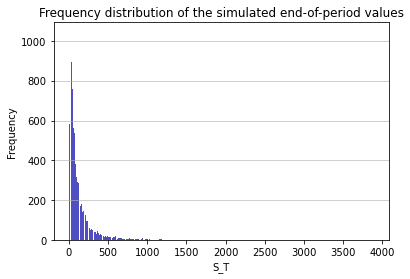

In [474]:
import matplotlib.pyplot as maplotpy
n, bins, patches = maplotpy.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

maplotpy.grid(axis='y', alpha=0.75)
maplotpy.xlabel('S_T')
maplotpy.ylabel('Frequency')
maplotpy.title('Frequency distribution of the simulated end-of-period values')

In [475]:
S = mcs_simulation_npy(1000)

In [476]:
S = npy.transpose(S)
S

array([[123.72      , 111.92519565, 108.31420859, ...,   3.68641   ,
          3.8377859 ,   3.9515726 ],
       [123.72      , 120.49060443, 123.98604461, ..., 162.80905015,
        171.63681144, 159.93649441],
       [123.72      , 123.95844713, 122.61249233, ...,  15.63410708,
         16.44718992,  16.45227386],
       ...,
       [123.72      , 119.3382401 , 123.90248121, ...,  82.62088429,
         80.29235253,  78.69508632],
       [123.72      , 121.35083777, 117.74548357, ...,  21.07015823,
         21.1412811 ,  22.51713546],
       [123.72      , 133.3220889 , 132.19229332, ..., 151.50500505,
        150.35083167, 149.44538292]])

In [478]:
p = npy.mean(npy.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 43.84589402624545


# Binomial Tree (CRR Tree)

Binomial Tree  describes an underlying instrument (litecoin) over a period of time rather than a single point.

Step 1: Create the binomial price tree

In [479]:
S0 = 123.72             # spot stock price
K = 110.0               # strike
T = 1                   # maturity 
r = 0.0163              # risk free rate 
sig = 1.1256            # diffusion coefficient or volatility
N = 3                  # number of periods or number of time steps  
payoff = "put"          # payoff 

In [480]:
dT = float(T) / N                             # Delta t
u = npy.exp(sig * npy.sqrt(dT))               # up factor
d = 1.0 / u                                   # down factor 

In [481]:
S = npy.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [482]:
S

array([[123.72      , 236.95882949, 453.84324987, 869.23832251],
       [  0.        ,  64.59619349, 123.72      , 236.95882949],
       [  0.        ,   0.        ,  33.72670719,  64.59619349],
       [  0.        ,   0.        ,   0.        ,  17.60925399]])

In [483]:
a = npy.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.3469304565210466

Step 2: Find option value at each final node

In [484]:
S_T = S[:,-1]
V = npy.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = npy.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = npy.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 45.40380651],
       [ 0.        ,  0.        ,  0.        , 92.39074601]])

Step 3: Find option value at earlier nodes

EUROPEAN OPTION

In [485]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = npy.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[45.14667643, 19.15542499,  0.        ,  0.        ],
       [ 0.        , 59.33065019, 29.49117172,  0.        ],
       [ 0.        ,  0.        , 75.67724686, 45.40380651],
       [ 0.        ,  0.        ,  0.        , 92.39074601]])

In [486]:
print('European ' + payoff, str( V[0,0]))

European put 45.14667642973752


# Black-Scholes Model

In [487]:
import scipy.stats as si

In [488]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (npy.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    d2 = (npy.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * npy.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * npy.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [489]:
S = data[-1]             # spot cryptocurrency price
K =  110.00              # strike price
T = 1.0                  # time to maturity
r = 0.0163               # risk free rate
vol = 1.1256             # diffusion coefficient or volatility annualised
payoff = "put"

In [490]:
put = euro_option_bs(S, K, T, r, vol, 'put')

In [491]:
euro_option_bs(S, K, T, r, vol, payoff)
print('Black-Scholes Put Price is', str(p))

Black-Scholes Put Price is 0.3469304565210466


In [492]:
euro_option_bs(123.72, 120, 1.0, 0.0163, 1.1256, 'put')
print('Black-Scholes Put Price is', str(p))

Black-Scholes Put Price is 0.3469304565210466


In [493]:
S = npy.linspace(50,150,11)
cp = npy.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 110, 1, 0.0163, 1.1273, 'put')

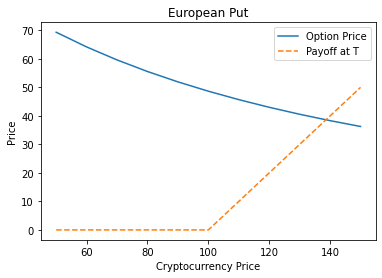

In [494]:
fig = maplotpy.figure()
maplotpy.plot(S, cp, '-')
maplotpy.plot(S, npy.maximum(S-100,0), '--')
maplotpy.xlabel('Cryptocurrency Price')
maplotpy.ylabel('Price')
maplotpy.title('European Put')
maplotpy.legend(['Option Price','Payoff at T'])

# Model Implementation Techniques

# Greeks

In [495]:
euro_option_bs(123.72, 110, 1, 0.0163, 1.1256, 'put')

42.01732613720954

In [496]:
euro_option_bs(123.72, 110, 1, 0.0163, 1.1256, 'call')

57.51579226174687

In [497]:
S = npy.linspace(80,200,11)
Call = npy.zeros((len(S),1))
Put = npy.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bs(S[i], 110, 1, 0.0163, 1.1256, 'call')
    Put [i] = euro_option_bs(S[i], 110, 1, 0.0163, 1.1256, 'put')

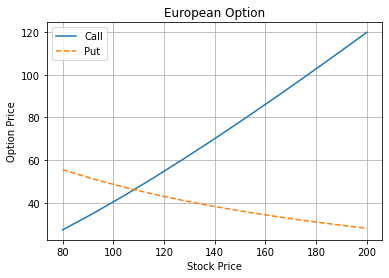

In [498]:
fig = maplotpy.figure()
maplotpy.plot(S, Call, '-')
maplotpy.plot(S, Put, '--')
maplotpy.grid()
maplotpy.xlabel('Stock Price')
maplotpy.ylabel('Option Price')
maplotpy.title('European Option')
maplotpy.legend(['Call','Put'])

# Delta  Δ

Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in litecoin's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [499]:
import numpy as npy
import scipy.stats as si

In [500]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (npy.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    if payoff == "call":
        delta = npy.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - npy.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [501]:
S = data[-1] 
K = 110
T = 1
r = 0.0163
q = 0.0
vol = 1.1256
d= delta(S, K, T, r, q, vol, 'put')
print('The Delta value is', d.round(4),'.','If the Litecoin price increase 1 dollar, then the value of the option will decrease by $',d.round(4),'.')

The Delta value is -0.2477 . If the Litecoin price increase 1 dollar, then the value of the option will decrease by $ -0.2477 .


In [502]:
S = npy.linspace(80,200,11)
Delta_Call = npy.zeros((len(S),1))
Delta_Put = npy.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 110, 1, 0.0163, 0.00, 1.1256, 'put')

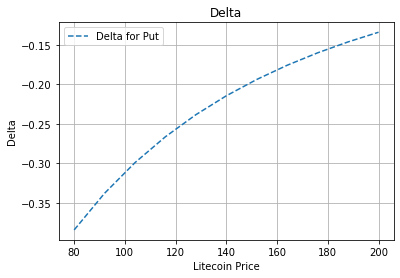

In [503]:
fig = maplotpy.figure()
maplotpy.plot(S, Delta_Put, '--')
maplotpy.grid()
maplotpy.xlabel('Litecoin Price')
maplotpy.ylabel('Delta')
maplotpy.title('Delta')
maplotpy.legend(['Delta for Put'])

In [504]:
S = npy.linspace(80, 200, 51)
T = npy.linspace(0.5, 2, 51)
Delta = npy.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 110, T[i], 0.0163, 0.0, 1.1256, 'put')

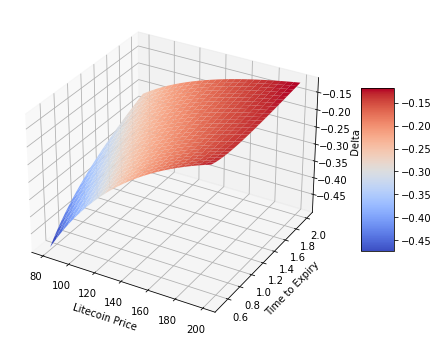

In [505]:
fig = maplotpy.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = npy.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=maplotpy.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

Delta Recalculated with different code

In [506]:
def delta_put(S, K, T, r, sigma):
    
    d1 = (npy.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * npy.sqrt(T))
    
    delta_put = si.norm.cdf(-d1, 0.0, 1.0)
    
    return -delta_put

In [507]:
def delta(S, K, T, r, sigma, option = 'call'):
    
    d1 = (npy.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * npy.sqrt(T))
    
    if option == 'call':
        result = si.norm.cdf(d1, 0.0, 1.0)
    if option == 'put':
        result = -si.norm.cdf(-d1, 0.0, 1.0)
        
    return result

In [508]:
delta(123.72, 110, 1, 0.0163, 1.1256, option = 'put')

-0.24771243962965145

In [509]:
S = npy.linspace(80,200,11)
Delta_Put = npy.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 110, 1, 0.0163, 1.1256, 'put')

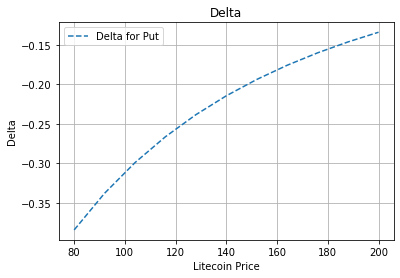

In [510]:
fig = maplotpy.figure()
maplotpy.plot(S, Delta_Put, '--')
maplotpy.grid()
maplotpy.xlabel('Litecoin Price')
maplotpy.ylabel('Delta')
maplotpy.title('Delta')
maplotpy.legend(['Delta for Put'])

# Theta Θ

In [511]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (npy.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    d2 = (npy.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    if payoff == "call":
        theta = vol * S * npy.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * npy.sqrt(T)) - q * S * npy.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * npy.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * npy.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * npy.sqrt(T)) - q * S * npy.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * npy.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [512]:
S = 123.72
K = 110
T = 1
r = 0.0163
q = 0.0
vol = 1.1256
theta(S, K, T, r, q, vol, 'put')

23.20308068680716

In [513]:
t = theta(S, K, T, r, q, vol, 'put')
print('The Delta value is', t.round(4),'.','If the Litecoin price increase 1 dollar, then the value of the option will decrease by $',t.round(4),'.')

The Delta value is 23.2031 . If the Litecoin price increase 1 dollar, then the value of the option will decrease by $ 23.2031 .


In [514]:
T = npy.linspace(80,200,11)
Theta_Call = npy.zeros((len(T),1))
Theta_Put = npy.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(S, K, T[i], r, q, vol, 'put')

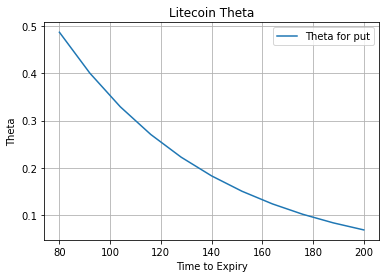

In [515]:
fig = maplotpy.figure()
maplotpy.plot(T, Theta_Put, '-')
maplotpy.grid()
maplotpy.xlabel('Time to Expiry')
maplotpy.ylabel('Theta')
maplotpy.title('Litecoin Theta')
maplotpy.legend(['Theta for put'])

In [516]:
S = npy.linspace(80, 200, 51)
T = npy.linspace(0.5, 2, 51)
Theta = npy.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 110, T[i], 0.0163, 0.0, 1.1256, 'put')

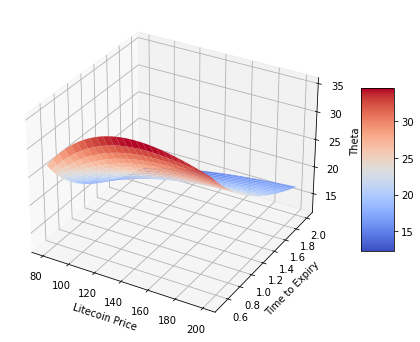

In [517]:
fig = maplotpy.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = npy.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=maplotpy.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma

Gamma, Γ, measures the rate of change in the delta with respect to a changes in litecoin price. 

In [518]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (npy.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    gamma = npy.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * npy.sqrt(T))
    
    return gamma

In [519]:
S = 123.72
K = 110
T = 1
r = 0.0163
q = 0.0
vol = 1.1256
gamma(S, K, T, r, q, vol, 'put')

0.0022707678698168183

In [520]:
print('The Delta value is', d.round(4),'.','If the Litecoin price increase 1 dollar, then the value of the option will decrease by $',d.round(4),'.')

The Delta value is -0.2477 . If the Litecoin price increase 1 dollar, then the value of the option will decrease by $ -0.2477 .


In [521]:
S = npy.linspace(80,200,11)
Gamma = npy.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], K, T, r, q, vol, 'put')

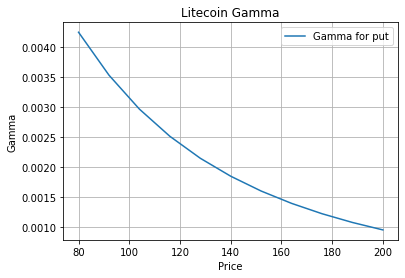

In [522]:
fig = maplotpy.figure()
maplotpy.plot(S, Gamma, '-')
maplotpy.grid()
maplotpy.xlabel('Price')
maplotpy.ylabel('Gamma')
maplotpy.title('Litecoin Gamma')
maplotpy.legend(['Gamma for put'])

In [523]:
S = npy.linspace(80, 200, 51)
T = npy.linspace(0.5, 2, 51)
Gamma = npy.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 105, T[i], 0.0163, 0.0, 1.1256, 'put')

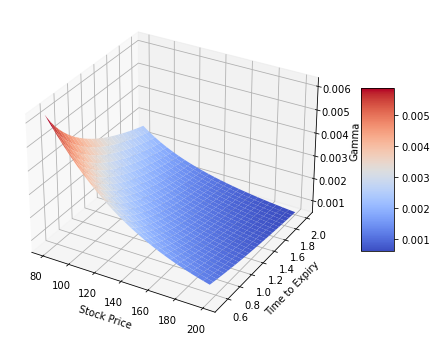

In [524]:
fig = maplotpy.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = npy.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=maplotpy.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega

In [525]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (npy.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    vega = S * npy.sqrt(T) * npy.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [526]:
S = 123.72
K = 110
T = 1
r = 0.0163
q = 0.0
vol = 1.1256
vega(S, K, T, r, q, vol, 'put')

39.123405201431524

In [527]:
vega(123.72, 110, 1, 0.0163, 0.0, 1.1256, 'put')

39.123405201431524

In [528]:
v = vega(123.72, 110, 1, 0.0163, 0.0, 1.1256, 'put')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 39.1234 . If the volatility increases 1%, then the value of the option will increase $ 0.39123399999999997 .


In [529]:
vol = npy.linspace(0.1,2,11)
Vega = npy.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(S, K, T, r, q, vol[i],'put')

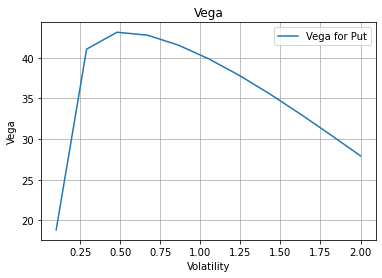

In [530]:
fig = maplotpy.figure()
maplotpy.plot(vol, Vega, '-')
maplotpy.grid()
maplotpy.xlabel('Volatility')
maplotpy.ylabel('Vega')
maplotpy.title('Vega')
maplotpy.legend(['Vega for Put'])

In [531]:
S = npy.linspace(80, 200, 51)
T = npy.linspace(0.5, 2, 51)
Vega = npy.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 110, T[i], 0.0163, 0.0, 1.1256, 'put')

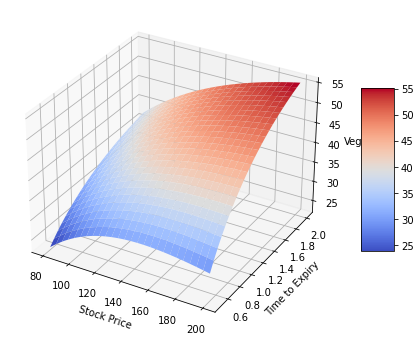

In [532]:
fig = maplotpy.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = npy.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=maplotpy.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho 𝜌

In [533]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (npy.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    d2 = (npy.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    if payoff == "call":
        rho =  K * T * npy.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * npy.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    return rho

In [534]:
S = 123.72
K = 110
T = 1
r = 0.0163
q = 0.0
vol = 1.1256
rho(S, K, T, r, q, vol, 'put')

-72.66430916819002

In [535]:
rho(123.72, 110, 1, 0.0163, 0.0, 1.1256, 'put')

-72.66430916819002

In [536]:
r = npy.linspace(0.01,0.05,11)
Rho_Call = npy.zeros((len(r),1))
Rho_Put = npy.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(100, 100, 1, r[i], 0.03, 0.25, 'put')

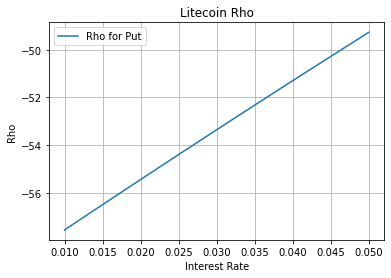

In [537]:
fig = maplotpy.figure()
maplotpy.plot(r, Rho_Put, '-')
maplotpy.grid()
maplotpy.xlabel('Interest Rate')
maplotpy.ylabel('Rho')
maplotpy.title('Litecoin Rho')
maplotpy.legend(['Rho for Put'])

In [538]:
S = npy.linspace(80, 200, 51)
T = npy.linspace(0.5, 2, 51)
Rho = npy.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 110, T[i], 0.0163, 0.0, 1.125, 'put')

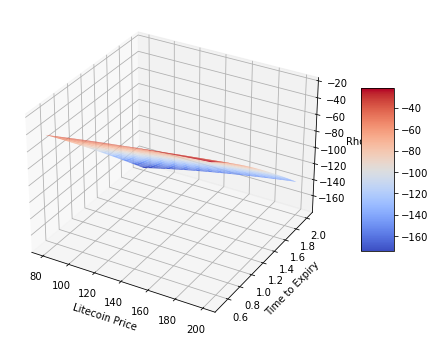

In [539]:
fig = maplotpy.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = npy.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=maplotpy.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed

In [540]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (npy.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    speed = - npy.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * npy.sqrt(T)) * (d1 + vol * npy.sqrt(T))
    
    return speed

In [541]:
S = 123.72
K = 110
T = 1
r = 0.0163
q = 0.0
vol = 1.1256
speed(S, K, T, r, q, vol, 'put')

-2.947002014469552e-05

In [542]:
S = npy.linspace(80,200,11)
Speed = npy.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 100, 1, 0.05, 0.03, 0.25, 'put')

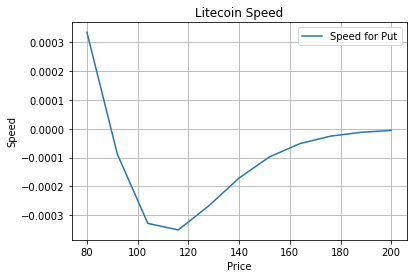

In [543]:
fig = maplotpy.figure()
maplotpy.plot(S, Speed, '-')
maplotpy.grid()
maplotpy.xlabel('Price')
maplotpy.ylabel('Speed')
maplotpy.title('Litecoin Speed')
maplotpy.legend(['Speed for Put'])

In [544]:
S = npy.linspace(80, 200, 51)
T = npy.linspace(0.5, 2, 51)
Speed = npy.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 110, T[i], 0.0163, 0.0, 1.1256, 'put')

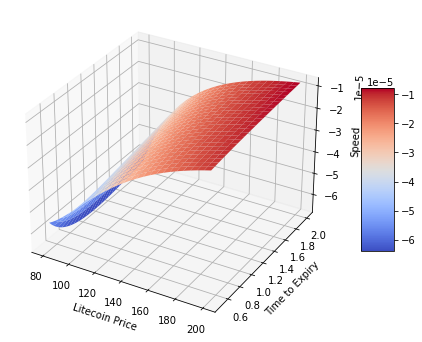

In [545]:
fig = maplotpy.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = npy.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=maplotpy.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);